<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px; padding:17px ">TP: Support Vector Machine (SVM)</p>


## Objectifs du TP :

**Appliquer les machines à vecteurs de support (SVM) pour la classification.**

**Pratiquer la division des données en ensembles d'apprentissage et de test.**

**Expérimenter avec la mise à l'échelle des caractéristiques et son impact sur la performance du modèle.**

**Évaluer la performance du modèle SVM en utilisant des métriques appropriées.**

- Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

- Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(6)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0


- Dataset information:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


- Dataset description:

In [5]:
dataset.describe(include='all')

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


- Null values:

In [6]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

- Data Correlation:

In [7]:
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


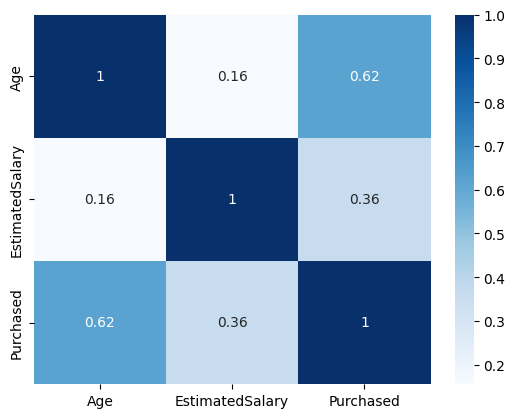

In [9]:
sns.heatmap(dataset.corr(), annot=True, cmap="Blues")
plt.show()

- Data separation:

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

- Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Shape de l'ensemble d'entraînement (X_train) :", X_train.shape)
print("Shape de l'ensemble de test (X_test) :", X_test.shape)
print("Shape de l'ensemble d'entraînement des étiquettes (y_train) :", y_train.shape)
print("Shape de l'ensemble de test des étiquettes (y_test) :", y_test.shape)

Shape de l'ensemble d'entraînement (X_train) : (300, 2)
Shape de l'ensemble de test (X_test) : (100, 2)
Shape de l'ensemble d'entraînement des étiquettes (y_train) : (300,)
Shape de l'ensemble de test des étiquettes (y_test) : (100,)


### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train[:10])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


### Training the SVM model on the Training set

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting a new result

In [18]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
# Afficher les résultats sur une seule ligne
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

Matrice de confusion :
 [[66  2]
 [ 8 24]]
Précision : 0.9


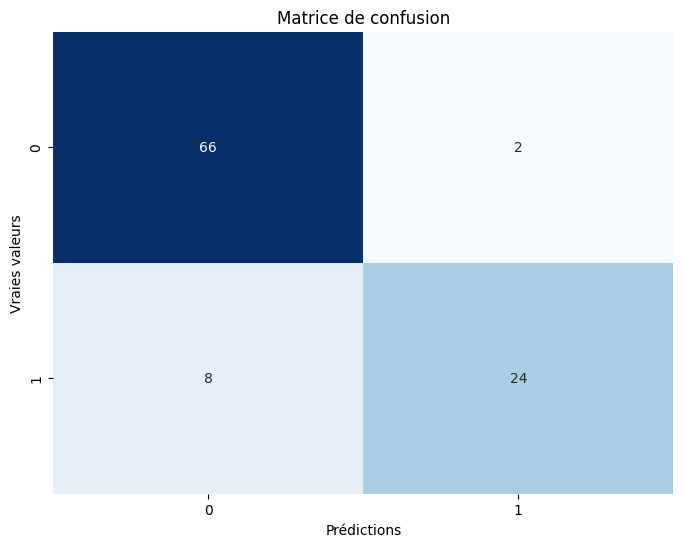

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# Affichage de la matrice de confusion
print("Matrice de confusion :\n", cm)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

# Tracé du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

### Visualising the Training set results

In [24]:
from matplotlib.colors import ListedColormap

C:\Users\admin\AppData\Local\Temp\ipykernel_1076\2957709405.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


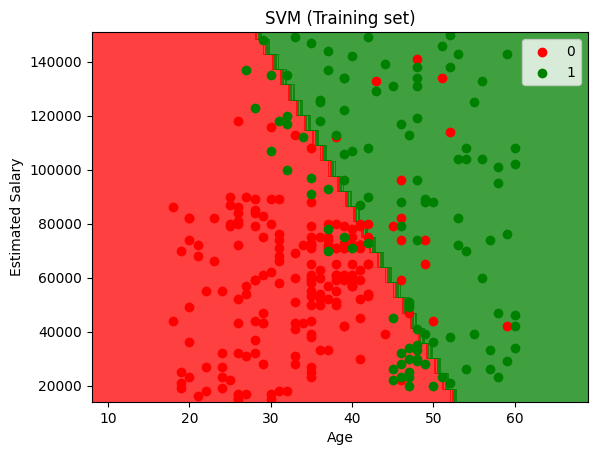

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1), 
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 10))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

C:\Users\admin\AppData\Local\Temp\ipykernel_1076\1904440677.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


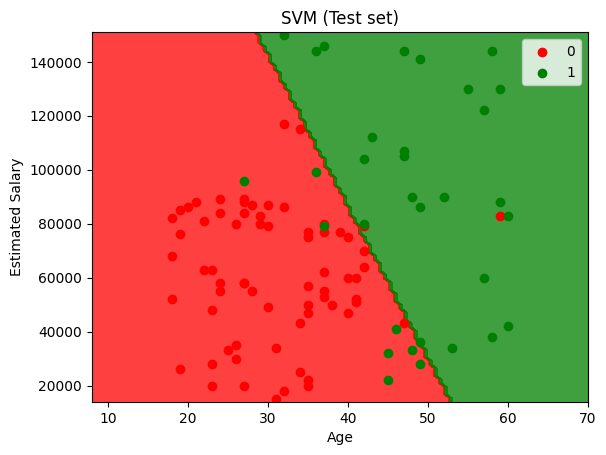

In [28]:
# Récupérer les valeurs originales de X_test et y_test
X_set, y_set = sc.inverse_transform(X_test), y_test

# Définir les limites pour les axes X et Y
x1_min, x1_max = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10
x2_min, x2_max = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000

# Définir la résolution de la grille
resolution = 100  # Vous pouvez ajuster cette valeur selon vos besoins

# Créer la grille avec une résolution plus faible
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution),
                     np.linspace(x2_min, x2_max, resolution))

# Prédictions sur la grille
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Tracé du contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

# Tracé des points de données
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Autres configurations du tracé
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### Fin.